In [28]:
import heapq
import numpy as np
import time
import matplotlib.pyplot as plt
import random 

In [29]:
# Dijkstra's algorithm (min-heap based priority queue and adjacency list)
def dijkstra_min_heap(graph, src):
    V = len(graph)
    dist = [float('inf')] * V
    dist[src] = 0
    pq = []
    heapq.heappush(pq, (0, src))

    while pq:
        current_dist, u = heapq.heappop(pq)
        
        if current_dist > dist[u]:
            continue

        for v, weight in graph[u]:
            if dist[u] + weight < dist[v]:
                dist[v] = dist[u] + weight
                heapq.heappush(pq, (dist[v], v))
    
    return dist



In [30]:
# Generate a random graph as adjacency list
def generate_random_graph_adj_list(V, E):
    graph = {i: [] for i in range(V)}
    edge_count = 0
    while edge_count < E:
        u = random.randint(0, V-1)
        v = random.randint(0, V-1)
        if u != v and v not in [x[0] for x in graph[u]]:  # Prevent duplicate edges
            weight = random.randint(1, 10)
            graph[u].append((v, weight))
            graph[v].append((u, weight))  # Undirected graph
            edge_count += 1
    return graph



In [31]:
# Empirical analysis for varying number of vertices (Adjacency List)
def run_time_vs_vertices_adj_list():
    vertices = [10, 50, 100, 200, 500, 1000]  # Reduced number of vertices for testing
    times = []

    for V in vertices:
        E = min(V * (V - 1) // 10, 10000)  # Adjust edge density, max edges capped at 10
        graph = generate_random_graph_adj_list(V, E)
        src = 0
        
        start_time = time.time()
        dijkstra_min_heap(graph, src)
        end_time = time.time()
        
        times.append(end_time - start_time)
    
    plt.plot(vertices, times, marker='o')
    plt.xlabel('Number of vertices (V)')
    plt.ylabel('Runtime (seconds)')
    plt.title('Dijkstra\'s Algorithm (Min-Heap) Runtime vs Number of Vertices')
    plt.grid(True)
    plt.show()



In [32]:
# Empirical analysis for varying number of edges (Adjacency List)
def run_time_vs_edges_adj_list():
    V = 1000  # Fixed number of vertices
    edges = [0, 100, 200, 500, 1000,2000]  # Number of edges
    times = []

    for E in edges:
        graph = generate_random_graph_adj_list(V, E)
        src = 0
        
        start_time = time.time()
        dijkstra_min_heap(graph, src)
        end_time = time.time()
        
        times.append(end_time - start_time)
    
    plt.plot(edges, times, marker='o')
    plt.xlabel('Number of edges (E)')
    plt.ylabel('Runtime (seconds)')
    plt.title('Dijkstra\'s Algorithm Runtime vs Number of Edges (Min-Heap)')
    plt.grid(True)
    plt.show()



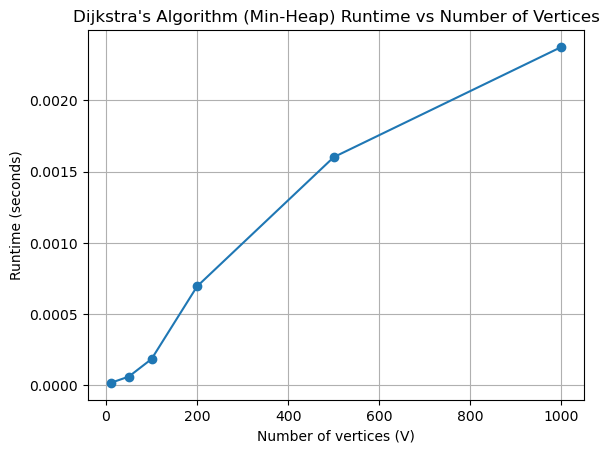

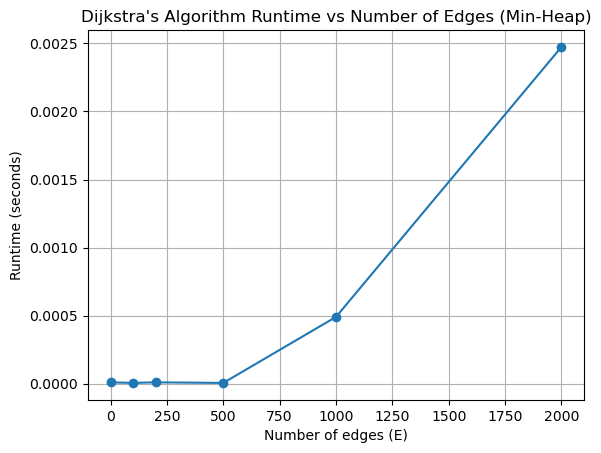

In [33]:
# Run both analyses for Part (b)
run_time_vs_vertices_adj_list()
run_time_vs_edges_adj_list()